In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load three CSV files
df2020 = pd.read_csv('mbot_battery_log_2020.csv')
df2021 = pd.read_csv('mbot_battery_log_2021.csv')
df2022 = pd.read_csv('mbot_battery_log_2022.csv')

gap_threshold = 100  # Define the gap threshold

# Store DataFrames in a list for easier looping
dataframes = [df2020, df2021, df2022]

# Adjust utime to start from 0 and check for gaps
for df in dataframes:
    df['utime'] = df['utime'] - df['utime'].iloc[0]  # Adjust utime to start from 0
    time_diff = df['utime'].diff()  # Calculate the time difference

    # Check if any time difference exceeds the threshold
    if (time_diff >= gap_threshold).any():
        gap_index = time_diff[time_diff >= gap_threshold].index[0]
        last_timestamp_before_gap = df.loc[gap_index - 1, 'utime']
        df.loc[gap_index:, 'utime'] = df.loc[gap_index:, 'utime'] - df.loc[gap_index, 'utime'] + last_timestamp_before_gap
    else:
        print("No time gaps exceeding the threshold were found in one of the files.")

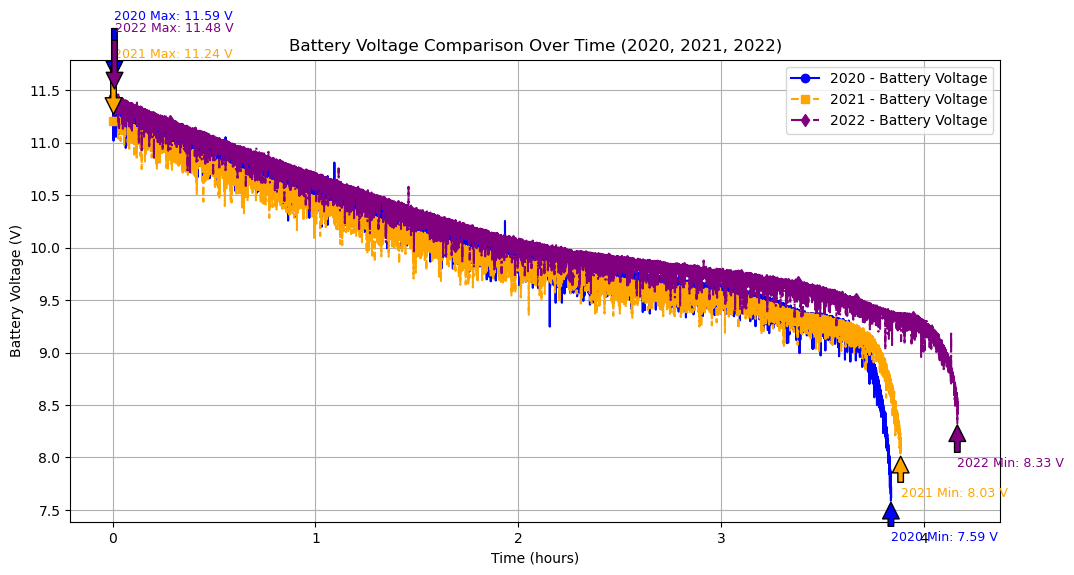

In [32]:
# Add a new column for hours in each data frame
df2020['hours'] = df2020['utime'] / 3600
df2021['hours'] = df2021['utime'] / 3600
df2022['hours'] = df2022['utime'] / 3600

# Set up a figure with subplots
plt.figure(figsize=(12, 6))

# Plot each CSV's battery voltage over time with appropriate labels
plt.plot(df2020['hours'], df2020['battery_voltage'], label='2020 - Battery Voltage', color='blue', linestyle='-', marker='o', markevery=1000)
plt.plot(df2021['hours'], df2021['battery_voltage'], label='2021 - Battery Voltage', color='orange', linestyle='--', marker='s', markevery=1000)
plt.plot(df2022['hours'], df2022['battery_voltage'], label='2022 - Battery Voltage', color='purple', linestyle='-.', marker='d', markevery=1000)

# Mark the maximum and minimum values for each dataset
for df, year, color in zip([df2020, df2021, df2022], ['2020', '2021', '2022'], ['blue', 'orange', 'purple']):
    max_voltage = df['battery_voltage'].max()
    min_voltage = df['battery_voltage'].min()
    plt.annotate(f'{year} Max: {max_voltage:.2f} V',
                 xy=(df['hours'][df['battery_voltage'].idxmax()], max_voltage),
                 xytext=(df['hours'][df['battery_voltage'].idxmax()], max_voltage * 1.05),
                 arrowprops=dict(facecolor=color, shrink=0.05), fontsize=9, color=color)
    plt.annotate(f'{year} Min: {min_voltage:.2f} V',
                 xy=(df['hours'][df['battery_voltage'].idxmin()], min_voltage),
                 xytext=(df['hours'][df['battery_voltage'].idxmin()], min_voltage * 0.95),
                 arrowprops=dict(facecolor=color, shrink=0.05), fontsize=9, color=color)

# Customize the plot with labels, grid, and title
plt.xlabel('Time (hours)')
plt.ylabel('Battery Voltage (V)')
plt.title('Battery Voltage Comparison Over Time (2020, 2021, 2022)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [33]:
# Add a new column for hours and apply rolling average for smoother data
for df in dataframes:
    df['hours'] = df['utime'] / 3600
    df['battery_voltage_smoothed'] = df['battery_voltage'].rolling(window=50, center=True).mean()  # Smooth with a 30-point rolling average

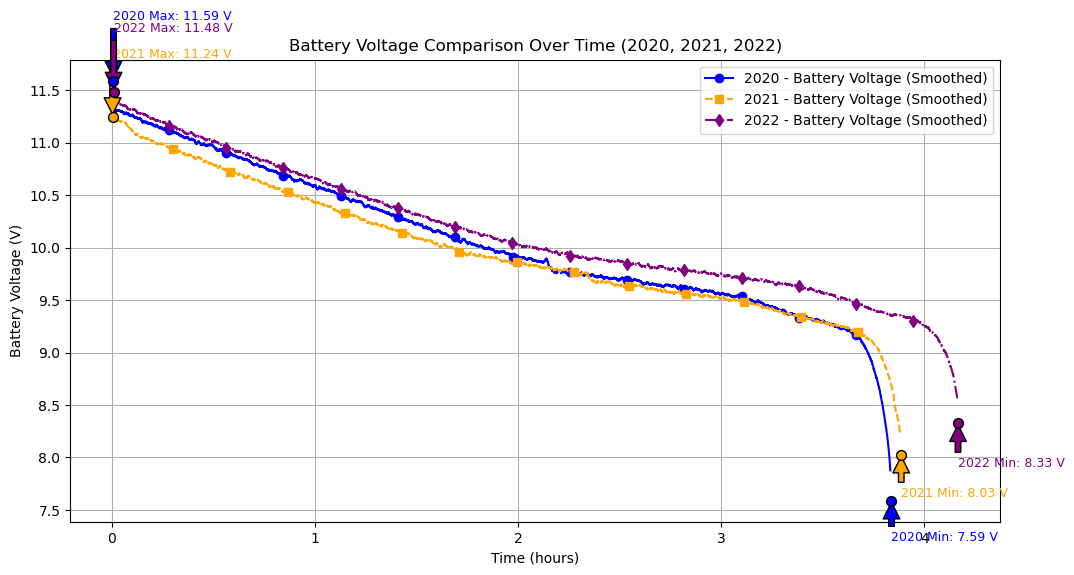

In [34]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot each CSV's smoothed battery voltage over time
plt.plot(df2020['hours'], df2020['battery_voltage_smoothed'], label='2020 - Battery Voltage (Smoothed)', color='blue', linestyle='-', marker='o', markevery=1000)
plt.plot(df2021['hours'], df2021['battery_voltage_smoothed'], label='2021 - Battery Voltage (Smoothed)', color='orange', linestyle='--', marker='s', markevery=1000)
plt.plot(df2022['hours'], df2022['battery_voltage_smoothed'], label='2022 - Battery Voltage (Smoothed)', color='purple', linestyle='-.', marker='d', markevery=1000)

# Plot the actual max and min points from the original data for each year
for df, year, color in zip([df2020, df2021, df2022], ['2020', '2021', '2022'], ['blue', 'orange', 'purple']):
    max_voltage = df['battery_voltage'].max()
    min_voltage = df['battery_voltage'].min()
    max_idx = df['battery_voltage'].idxmax()
    min_idx = df['battery_voltage'].idxmin()

    # Plot the max and min points
    plt.scatter(df.loc[max_idx, 'hours'], max_voltage, color=color, edgecolor='black', s=50, zorder=5)
    plt.scatter(df.loc[min_idx, 'hours'], min_voltage, color=color, edgecolor='black', s=50, zorder=5)

    # Annotate the max and min points
    plt.annotate(f'{year} Max: {max_voltage:.2f} V',
                 xy=(df.loc[max_idx, 'hours'], max_voltage),
                 xytext=(df.loc[max_idx, 'hours'], max_voltage * 1.05),
                 arrowprops=dict(facecolor=color, shrink=0.05), fontsize=9, color=color)
    plt.annotate(f'{year} Min: {min_voltage:.2f} V',
                 xy=(df.loc[min_idx, 'hours'], min_voltage),
                 xytext=(df.loc[min_idx, 'hours'], min_voltage * 0.95),
                 arrowprops=dict(facecolor=color, shrink=0.05), fontsize=9, color=color)

# Customize the plot with labels, grid, and title
plt.xlabel('Time (hours)')
plt.ylabel('Battery Voltage (V)')
plt.title('Battery Voltage Comparison Over Time (2020, 2021, 2022)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()